# Detect Landmarks of Face (MTCNN)

[{'box': [111, 44, 74, 99], 'confidence': 0.992749035358429, 'keypoints': {'left_eye': (131, 87), 'right_eye': (166, 88), 'nose': (147, 111), 'mouth_left': (131, 122), 'mouth_right': (159, 123)}}]
얼굴 인식좌표: [111, 44, 74, 99]


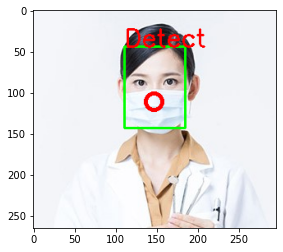

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mtcnn import MTCNN


def detect_landmarks(img):
    new_img = img.copy()
    frame_rgb = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)

    ##### MTCNN 얼굴 인식 #####
    faces = detector.detect_faces(frame_rgb)
    print(faces)
    if faces:
        face = faces[0]['box']
        if face[0] < 0: face[0] = 0
        if face[1] < 0: face[1] = 0
        print('얼굴 인식좌표:', face)
        
        # 얼굴좌표
        x=face[0]; y=face[1]; w=face[2]; h=face[3]

        # 복사본 이미지에 얼굴의 위치를 표시
        center = (x + w//2, y + h//2)
        img_marked = cv2.rectangle(new_img, (x,y), (x+w,y+h), (0,255,0), 2)
        img_marked = cv2.putText(new_img, 'Detect', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # 관심영역(Region Of Interest) 설정
        ROIface = frame_rgb[y:y+h,x:x+w]

        
        ##### MTCNN 코인식 #####
        nose_center = (faces[0]['keypoints']['nose'][0], faces[0]['keypoints']['nose'][1])
        img_marked = cv2.circle(new_img, nose_center, 10, (0, 0, 255), 3)  
        
        return img_marked
    
    else:
        return frame_rgb


# MTCNN으로 얼굴 인식
detector = MTCNN() # detector 객체 생성


# Load Image
# 맨얼굴
test1 = cv2.imread('../face_sample.jpg')

# 코스크
test2 = cv2.imread('../test2(nose).jpg')

# 마스크착용
test3 = cv2.imread('../test(mask).jpg')


# Detect Landmarks of Face
img_detected = detect_landmarks(test3)

plt.imshow(cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB))
# plt.savefig('../mtcnn(nose).png')

# Detect Landmarks of Face (MTCNN + HaarCascade)

[{'box': [111, 44, 74, 99], 'confidence': 0.992749035358429, 'keypoints': {'left_eye': (131, 87), 'right_eye': (166, 88), 'nose': (147, 111), 'mouth_left': (131, 122), 'mouth_right': (159, 123)}}]
얼굴 인식좌표: [111, 44, 74, 99]
코 인식좌표: ()


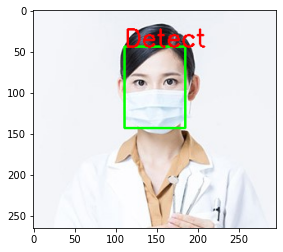

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mtcnn import MTCNN


def detect_landmarks(img):
    new_img = img.copy()
    frame_rgb = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)

    ##### MTCNN 얼굴 인식 #####
    faces = detector.detect_faces(frame_rgb)
    print(faces)
    if faces:
        face = faces[0]['box']
        if face[0] < 0: face[0] = 0
        if face[1] < 0: face[1] = 0
        print('얼굴 인식좌표:', face)
        
        # 얼굴좌표
        x=face[0]; y=face[1]; w=face[2]; h=face[3]

        # 복사본 이미지에 얼굴의 위치를 표시
        center = (x + w//2, y + h//2)
        img_marked = cv2.rectangle(new_img, (x,y), (x+w,y+h), (0,255,0), 2)
        img_marked = cv2.putText(new_img, 'Detect', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # 관심영역(Region Of Interest) 설정
        ROIface = frame_rgb[y:y+h,x:x+w]

           
        ##### HaarCascade 코 인식 #####
        nose = nose_cascade.detectMultiScale(ROIface)
        print('코 인식좌표:', nose)
        if type(nose) == type(np.array([])):
            # 코가 검출되었다면 코 위치에 대한 좌표정보를 리턴받는다
            nx=nose[0][0]; ny=nose[0][1]; nw=nose[0][2]; nh=nose[0][3]
            
            # 복사본 이미지에 코의 위치를 표시
            nose_center = (x + nx + nw//2, y + ny + nh//2)
            print('코 인식 중심좌표:', nose_center)
            radius = int(round((nw + nh) * 0.25))
            img_marked = cv2.circle(new_img, nose_center, radius, (0, 0, 255), 2)
        else:
            return img_marked
            
        return img_marked
    
    else:
        return frame_rgb


# MTCNN으로 얼굴 인식
detector = MTCNN() # detector 객체 생성

# 코를 검출하기 위해 미리 학습시켜 놓은 XML 포맷으로 저장된 분류기를 로드
nose_cascade = cv2.CascadeClassifier('./haarcascade_mcs_nose.xml')


# Load Image
# 맨얼굴
test1 = cv2.imread('../face_sample.jpg')

# 코스크
test2 = cv2.imread('../test2(nose).jpg')

# 마스크착용
test3 = cv2.imread('../test(mask).jpg')

# Detect Landmarks of Face
img_detected = detect_landmarks(test3)

plt.imshow(cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB))
# plt.savefig('../mtcnn_haar(nose).png')